In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

In [2]:
url = 'https://raw.githubusercontent.com/digipodium/Datasets/main/regression/dataA.csv'
df = pd.read_csv(url)
df.head()

,x,y,z
0,81.997014,99.017636,a
1,41.724756,73.680872,a
2,26.566336,70.189922,a
3,124.561476,12.295715,a
4,142.729102,46.652237,a


<AxesSubplot:xlabel='x', ylabel='y'>

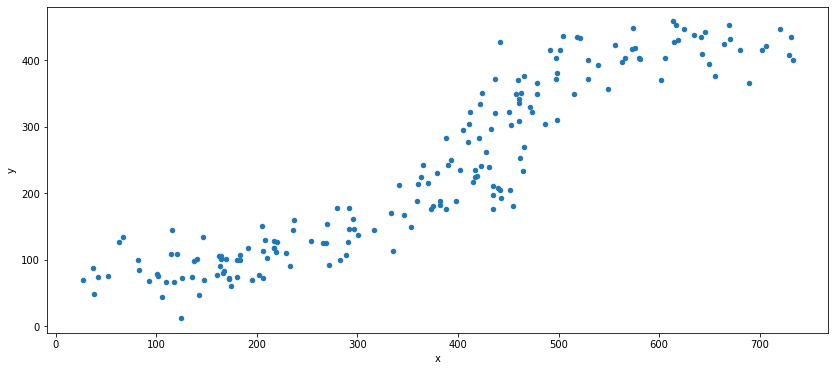

In [3]:
df.plot(kind = 'scatter', x = 'x', y='y', figsize = (14, 6))

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(df[['x']].values, df.y.values, test_size=.2, random_state=1)

In [5]:
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [6]:
model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(xtrain, ytrain)
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)
mae_train = mean_absolute_error(ytrain, ypred_train)
mae_test = mean_absolute_error(ytest, ypred_test)
print(mae_train, mae_test)

40.376620692603154 36.179241687393656


In [7]:
for degree in range(1, 15):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(xtrain, ytrain)
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    mae_train = mean_absolute_error(ytrain, ypred_train)
    mae_test = mean_absolute_error(ytest, ypred_test)
    print(mae_train, mae_test)

41.038408406054856 37.266750724564716
40.376620692603154 36.179241687393656
32.22820278035303 27.212180390134005
30.905774619493904 27.27864506953166
30.207715240180235 27.697257226242133
29.560531979618926 28.258072933130087
29.679424066827355 28.402485864962077
29.918667312113964 28.422015246468703
30.045102337580158 28.46716250282975
30.135718347346284 28.762461390195952
30.238918268056178 29.08393406222281
30.360247355937975 29.382711136502774
30.81193526040779 29.64937317955023
31.634708734774847 29.927110348963392


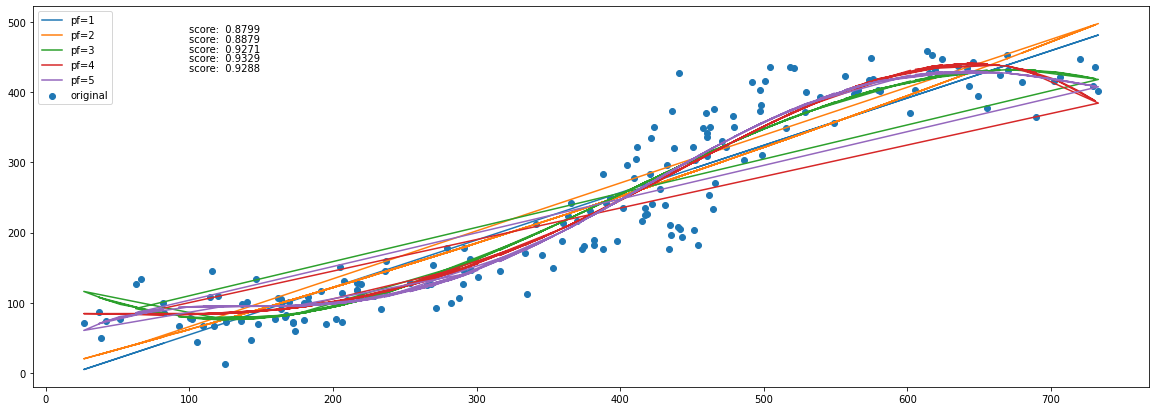

In [8]:
result = []
plt.figure(figsize=(20, 7))
for degree in [1,2, 3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(xtrain, ytrain)
    ypred_train = model.predict(xtrain)
    ypred_test = model.predict(xtest)
    mae_train = mean_absolute_error(ytrain, ypred_train)
    mae_test = mean_absolute_error(ytest, ypred_test)
    result.append({
        'sno': degree,
        'train_error': mae_train,
        'test_error': mae_test
    })
    score = r2_score(ytest, ypred_test)
    plt.plot(df['x'], model.predict(df[['x']].values), label=f'pf={degree}')
    plt.text(100, 500-degree*14, f'score: {score: .4f}')
plt.scatter(x=df['x'], y=df['y'],label='original')
plt.legend()
plt.show()    

   

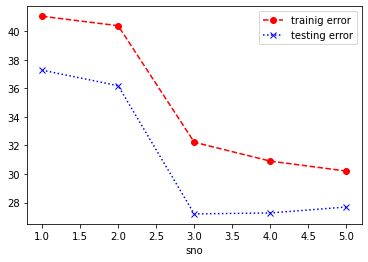

In [9]:
errordf = pd.DataFrame(result)
errordf.set_index('sno', inplace= True)
errordf['train_error'].plot(style='ro--', label= 'trainig error')
errordf['test_error'].plot(style='bx:', label = 'testing error')
plt.legend()
plt.show()